# Classification Of Wine

This is the simple classification task performed on whine dataset. In this I have showed that LinearSVC performs really well on the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/HP/Desktop/Knight ML Assignment/data/train.csv')
temp = data

In [3]:
df = pd.DataFrame(data)

# EDA

In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
user_name             63264 non-null object
country               82622 non-null object
review_title          82657 non-null object
review_description    82657 non-null object
designation           59010 non-null object
points                82657 non-null int64
price                 77088 non-null float64
province              82622 non-null object
region_1              69903 non-null object
region_2              35949 non-null object
winery                82657 non-null object
variety               82657 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [5]:
data.shape

(82657, 12)

In [6]:
data.dtypes

user_name              object
country                object
review_title           object
review_description     object
designation            object
points                  int64
price                 float64
province               object
region_1               object
region_2               object
winery                 object
variety                object
dtype: object

In [7]:
data.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


In [8]:
data.isnull()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,True,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False
5,False,False,False,False,False,False,False,False,False,True,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,True,False,False


In [9]:
data.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

There are many missing vales in the dataset, both in integer and object type.Since we have large number of data for train we can drop the rows with missing valus in it by using drop function.

In [10]:
data.dropna(inplace=True) 
data = data

In [11]:
data

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
6,@wawinereport,US,Gordon Estate 2012 Tradition Red (Columbia Val...,"Half Syrah and half Cabernet Sauvignon, with 4...",Tradition,91,45.0,Washington,Columbia Valley (WA),Columbia Valley,Gordon Estate,Red Blend
7,@vboone,US,Rock Wall 2014 Monte Rosso Reserve Zinfandel (...,"High-toned red fruit stars in this wine, a nic...",Monte Rosso Reserve,90,50.0,California,Sonoma County,Sonoma,Rock Wall,Zinfandel
8,@paulgwine,US,Elizabeth Chambers 2014 Falcon Glen Vineyard P...,"Displaying typical McMinnville AVA subtlety, t...",Falcon Glen Vineyard,91,48.0,Oregon,McMinnville,Willamette Valley,Elizabeth Chambers,Pinot Noir
10,@vboone,US,Cuvaison 2014 Estate Grown Sauvignon Blanc (Ca...,With an alluring bouquet of fresh-cut jasmine ...,Estate Grown,90,18.0,California,Carneros,Napa-Sonoma,Cuvaison,Sauvignon Blanc
34,@paulgwine,US,Durant 2013 Raven Chardonnay (Dundee Hills),"Peach pit, apple and pear fruit flavors combin...",Raven,92,25.0,Oregon,Dundee Hills,Willamette Valley,Durant,Chardonnay
37,@vboone,US,Keating 2013 Finvarra Red (North Coast),"From vineyards across both Napa and Sonoma, th...",Finvarra,92,55.0,California,North Coast,North Coast,Keating,Bordeaux-style Red Blend
38,@mattkettmann,US,Dragonette 2012 Vogelzang Sauvignon Blanc (Hap...,This is a softer Sauvignon Blanc for those not...,Vogelzang,88,42.0,California,Happy Canyon of Santa Barbara,Central Coast,Dragonette,Sauvignon Blanc
42,@vboone,US,Lawer 2015 Rosé of Syrah (Knights Valley),"Entirely varietal, and given five months to ge...",Rosé of,84,22.0,California,Knights Valley,Sonoma,Lawer,Syrah
47,@mattkettmann,US,Tensley 2015 All Blocks Tensley Vineyards Red ...,Joey Tensley departs from his usual dark fruit...,All Blocks Tensley Vineyards,91,34.0,California,Santa Barbara County,Central Coast,Tensley,Rhône-style Red Blend
50,@wawinereport,US,Maryhill 2014 Proprietor's Reserve Sangiovese ...,"The high-toned aromas of raspberry, barrel spi...",Proprietor's Reserve,87,36.0,Washington,Columbia Valley (WA),Columbia Valley,Maryhill,Sangiovese


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
user_name             63264 non-null object
country               82622 non-null object
review_title          82657 non-null object
review_description    82657 non-null object
designation           59010 non-null object
points                82657 non-null int64
price                 77088 non-null float64
province              82622 non-null object
region_1              69903 non-null object
region_2              35949 non-null object
winery                82657 non-null object
variety               82657 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


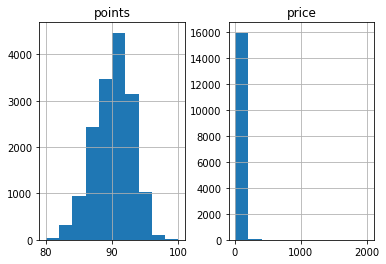

In [12]:
df.info()
data.hist()
plt.show()

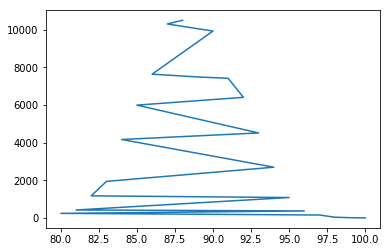

In [13]:
df['points'].value_counts() 
df['points'].value_counts().plot()

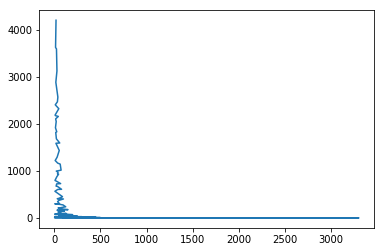

In [14]:
df['price'].value_counts() 
df['price'].value_counts().plot()

In [15]:
unique_value = data["province"].nunique()

In [16]:
print(unique_value)

4


In [17]:
unique_value1 = data["region_1"].nunique()

In [18]:
print(unique_value1)

165


In [19]:
unique_value2 = data["region_2"].nunique()

In [20]:
print(unique_value2)

17


In [21]:
unique_value3 = data["variety"].nunique()

In [22]:
print(unique_value3)

26


Text(0.5,1,'variety')

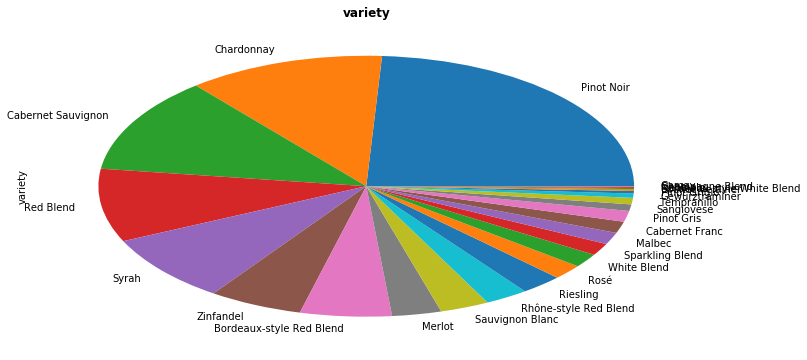

In [23]:
plt.figure(figsize=(12,6)) 
data['variety'].value_counts()[:26].plot(kind = 'pie')
plt.title('variety', weight = 'bold')

from the above pie chart we can see that Pinot Noir is the most reviewed wine variety and Chardonnay is the second most reviewed.

Text(0.5,1,'province')

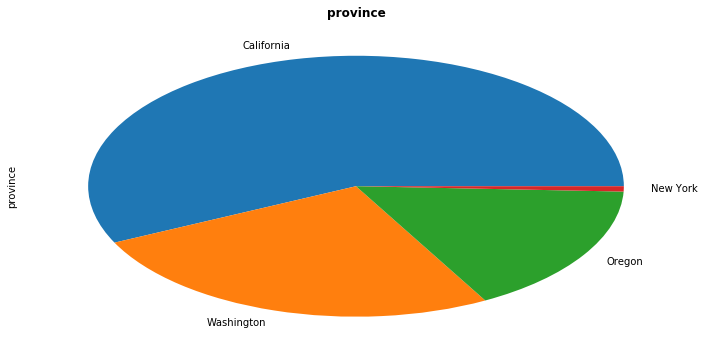

In [25]:
plt.figure(figsize=(12,6)) 
data['province'].value_counts()[:26].plot(kind = 'pie')
plt.title('province', weight = 'bold')

from the above pie chart we can see that the winesfrom california are the most reviewed than others.

Text(0.5,1,'region_2')

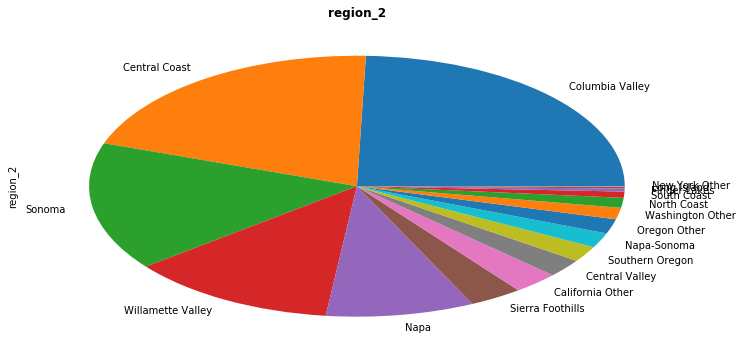

In [26]:
plt.figure(figsize=(12,6)) 
data['region_2'].value_counts()[:26].plot(kind = 'pie')
plt.title('region_2', weight = 'bold')

The above pie chart shows the number of reviewed wines from each region.

In [27]:
#spliting data
from sklearn.model_selection import train_test_split
X= df['review_description']

y= df['variety']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In the above part we are selecting the features for the classification.

In [28]:
#chwching simple models on dataset
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

clf1=LinearSVC()
clf2=LogisticRegression()
clfs=[clf1,clf2]

In [32]:
#checking the classifier which perform the best
for clf in clfs:
    clf = Pipeline([('tfid', TfidfVectorizer()),
                  ('clf', clf)
                  ])
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    print(classification_report(y_test,prediction))
    print(accuracy_score(y_test,prediction))

                            precision    recall  f1-score   support

  Bordeaux-style Red Blend       0.70      0.74      0.72      2274
Bordeaux-style White Blend       0.65      0.46      0.54       325
            Cabernet Franc       0.63      0.37      0.47       444
        Cabernet Sauvignon       0.63      0.71      0.66      3022
           Champagne Blend       0.73      0.58      0.65       451
                Chardonnay       0.74      0.87      0.80      3788
                     Gamay       0.74      0.59      0.66       318
            Gewürztraminer       0.78      0.64      0.70       342
          Grüner Veltliner       0.72      0.71      0.72       415
                    Malbec       0.58      0.53      0.55       869
                    Merlot       0.60      0.41      0.49      1008
                  Nebbiolo       0.78      0.84      0.81       905
              Pinot Grigio       0.65      0.53      0.59       327
                Pinot Gris       0.66      0.49

LinearSVC is dominating other classifier as we can see. So best choice for this classifiaction task is LinearSVC. I hope it helps you in learning.

Now we can apply on the given testset.


In [33]:
test = pd.read_csv("C:/Users/HP/Desktop/Knight ML Assignment/data/test.csv")
y_test = test['review_description']
test

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole
5,NaN,US,Mount Pleasant Winery NV Villagio Off Dry Whit...,The timid nose squeaks out notes of Chinese fi...,Villagio Off Dry,82,9.0,Missouri,Missouri,NaN,Mount Pleasant Winery
6,@vossroger,France,Château Trolliet Lafite 2010 Red (Côtes de Ber...,"A structured wine that has berry fruits, black...",NaN,89,NaN,Southwest France,Côtes de Bergerac,NaN,Château Trolliet Lafite
7,@vboone,US,Dry Creek Vineyard 2013 Cabernet Sauvignon (Dr...,"This is a remarkable value, over-delivering in...",NaN,88,26.0,California,Dry Creek Valley,Sonoma,Dry Creek Vineyard
8,@wineschach,Chile,Viña Casas Patronales 2010 Mixtura Red (Maule ...,"Staunch herbal aromas of tobacco, olive, rubbe...",Mixtura,88,25.0,Maule Valley,NaN,NaN,Viña Casas Patronales
9,@kerinokeefe,Italy,Contadi Castaldi NV Rosé Sparkling (Franciacorta),"A blend of 65% Chardonnay and 35% Pinot Nero, ...",Rosé,88,24.0,Lombardy,Franciacorta,NaN,Contadi Castaldi


In [34]:
clf = Pipeline([('tfid', TfidfVectorizer()),
                  ('clf', LinearSVC())
                  ])

In [35]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfid', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [36]:
prediction = clf.predict(y_test)

In [37]:
final = pd.DataFrame(prediction)

In [38]:
final

,0
0,Pinot Noir
1,Malbec
2,Chardonnay
3,Malbec
4,Sangiovese
5,Chardonnay
6,Bordeaux-style Red Blend
7,Cabernet Sauvignon
8,Red Blend
9,Sparkling Blend


In [39]:
df.to_csv("D:Wine_Analysis_Test_Results.csv")

In [40]:
tdata = pd.read_csv("D:Wine_Analysis_Test_Results.csv")
tdata.head()

,Unnamed: 0,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec
